In [1]:
import pandas as pd
#import arff
import os
import warnings
warnings.filterwarnings('ignore')


# Installing Kaggle CLI
#!pip install kaggle
# Placing the configuration to access the kaggle API
#!cp kaggle.json /root/.kaggle

# Downloading the dataset from kaggle
!kaggle datasets download -d mansoordaku/ckdisease!
!unzip -o ckdisease.zip
# The above dataset contains the file in csv format.



# Download dataset from UCI repository
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
! unrar x -y ./Chronic_Kidney_Disease.rar
# The above resource contains the file in ARFF format. But we will use the json, csv, and excel format.


dataframe1 = pd.read_csv("kidney_disease.csv")


# Loading data from local machine in xlsx and json format
dataframe2 = pd.read_excel("kidney_disease.xlsx")
dataframe3 = pd.read_json("kidney_disease.json")


merge = pd.merge(dataframe1[["id", "age", "bp", "sg", "al", "su", "rbc", "pc"]], # taking initial 7 columns from dataframe1
                 dataframe2[["id", "pcc", "ba", "bgr", "bu","sc","sod","pot", "hemo", "pcv", "wc", "rc"]], # Another 11 columns from data 2
                 on = "id"
                 )

final_data = pd.merge(merge, # taking first merge
                      dataframe3[["id", "htn", "dm", "cad", "appet", "pe", "ane", "classification"]],
                      on = "id"
                      )

Traceback (most recent call last):
  File "/opt/tljh/user/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/tljh/user/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/tljh/user/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/jupyter-ajithkumar-07/.kaggle. Or use the environment method.
unzip:  cannot find or open ckdisease.zip, ckdisease.zip.zip or ckdisease.zip.ZIP.
--2021-05-14 04:49:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19260 (19K) [application/x-httpd-php]
Saving to: ‘Chronic_Kidne

In [2]:
final_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# Getting number of rows and columns
print("\n\nNumber of rows: {}".format(final_data.shape[0]))
print("Number of Columns: {}".format(final_data.shape[1]))



Number of rows: 400
Number of Columns: 26


********************************************************************************************************************************************
# Dealing with NAN Values
Let is check for Null values in the Data.

In [4]:
# Check for any Null or Nan Values
final_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                72
wc                107
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

There are quite a lot of NULL values in few columns, dropping all rows containing Null values may lead us to significant amount of information loss. Let us see how many samples will be left when we drop all rows containing Null values.

In [5]:
temp_data = final_data.dropna(how = "any")
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              156 non-null    int64  
 1   age             156 non-null    float64
 2   bp              156 non-null    float64
 3   sg              156 non-null    float64
 4   al              156 non-null    float64
 5   su              156 non-null    float64
 6   rbc             156 non-null    object 
 7   pc              156 non-null    object 
 8   pcc             156 non-null    object 
 9   ba              156 non-null    object 
 10  bgr             156 non-null    float64
 11  bu              156 non-null    float64
 12  sc              156 non-null    float64
 13  sod             156 non-null    float64
 14  pot             156 non-null    float64
 15  hemo            156 non-null    float64
 16  pcv             156 non-null    float64
 17  wc              156 non-null    obj

There are only 156 rows left when we drop all rows containing NaN values. That results in quite a high amount of information loss, only one third of the data is left. We will try to drop the columns which contains most Null and will do analysis on remaining columns, that will allow us to perform better analysis on remaining variables.

In [6]:
data = final_data.drop(["rbc", "sod", "pot", "wc", "rc", "pcv", "hemo", "pc"], axis = 1)
data = data.dropna(how = "any")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              289 non-null    int64  
 1   age             289 non-null    float64
 2   bp              289 non-null    float64
 3   sg              289 non-null    float64
 4   al              289 non-null    float64
 5   su              289 non-null    float64
 6   pcc             289 non-null    object 
 7   ba              289 non-null    object 
 8   bgr             289 non-null    float64
 9   bu              289 non-null    float64
 10  sc              289 non-null    float64
 11  htn             289 non-null    object 
 12  dm              289 non-null    object 
 13  cad             289 non-null    object 
 14  appet           289 non-null    object 
 15  pe              289 non-null    object 
 16  ane             289 non-null    object 
 17  classification  289 non-null    obj

Now we have 289 data points, we can do analysis on remaining variables.

In [7]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

As the data is cleaned, we can move forward with the analysis.

********************************************************************************************************************************************
### Data Transformation
Transforming the data for better representation.

In [8]:
data['pcc'] = data.pcc.replace(['present','notpresent'], ['1', '0'])
data['ba'] = data.ba.replace(['present','notpresent'], ['1', '0'])
data['htn'] = data.htn.replace(['yes','no'], ['1', '0'])
data['dm'] = data.dm.replace(['yes','no'], ['1', '0'])
data['cad'] = data.cad.replace(['yes','no'], ['1', '0'])
data['appet'] = data.appet.replace(['good','poor'], ['1', '0'])
data['pe'] = data.pe.replace(['yes','no'], ['1', '0'])
data['ane'] = data.ane.replace(['yes','no'], ['1', '0'])
data['classification'] = data.classification.replace(['ckd','ckd\t','notckd'], ['positive', 'positive','negative'])
data.head()

,id,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,121.0,36.0,1.2,1,1,0,1,0,0,positive
2,2,62.0,80.0,1.010,2.0,3.0,0,0,423.0,53.0,1.8,0,1,0,0,0,1,positive
3,3,48.0,70.0,1.005,4.0,0.0,1,0,117.0,56.0,3.8,1,0,0,0,1,1,positive
4,4,51.0,80.0,1.010,2.0,0.0,0,0,106.0,26.0,1.4,0,0,0,1,0,0,positive
5,5,60.0,90.0,1.015,3.0,0.0,0,0,74.0,25.0,1.1,1,1,0,1,1,0,positive


********************************************************************************************************************************************

## Classwise Analysis of Variables
Let us see the description of varibles for all data corresponding to positive class and negative class.

In [9]:
# Selecting the positive class samples from data
data[data['classification'] == 'positive'].describe()

,id,age,bp,sg,al,su,bgr,bu,sc
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,124.150943,57.144654,79.685535,1.013994,1.748428,0.811321,178.572327,72.044654,3.943396
std,74.962200,14.109354,13.426847,0.004699,1.349958,1.374127,91.890996,58.180453,4.499853
min,0.000000,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.600000
25%,60.500000,50.000000,70.000000,1.010000,1.000000,0.000000,108.500000,32.000000,1.500000
50%,126.000000,60.000000,80.000000,1.015000,2.000000,0.000000,150.000000,54.000000,2.200000
75%,186.500000,66.000000,90.000000,1.015000,3.000000,1.000000,232.000000,91.000000,4.000000
max,249.000000,90.000000,120.000000,1.025000,4.000000,5.000000,490.000000,391.000000,32.000000


In [10]:
# Selecting the negative class samples from data
data[data['classification'] == 'negative'].describe()

,id,age,bp,sg,al,su,bgr,bu,sc
count,130.000000,130.000000,130.000000,130.000000,130.0,130.0,130.000000,130.000000,130.000000
mean,327.138462,46.215385,71.846154,1.022423,0.0,0.0,107.923077,32.676923,0.872308
std,44.946610,15.412662,8.607245,0.002508,0.0,0.0,18.603832,11.649411,0.258504
min,250.000000,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,0.400000
25%,286.250000,34.000000,60.000000,1.020000,0.0,0.0,94.000000,23.000000,0.600000
50%,330.500000,46.000000,70.000000,1.020000,0.0,0.0,107.500000,33.000000,0.900000
75%,365.750000,58.000000,80.000000,1.025000,0.0,0.0,123.750000,44.000000,1.100000
max,399.000000,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,1.200000


In [11]:
# Let is count the frquency of positive and negative class samples in the data
data["classification"].describe()

count          289
unique           2
top       positive
freq           159
Name: classification, dtype: object

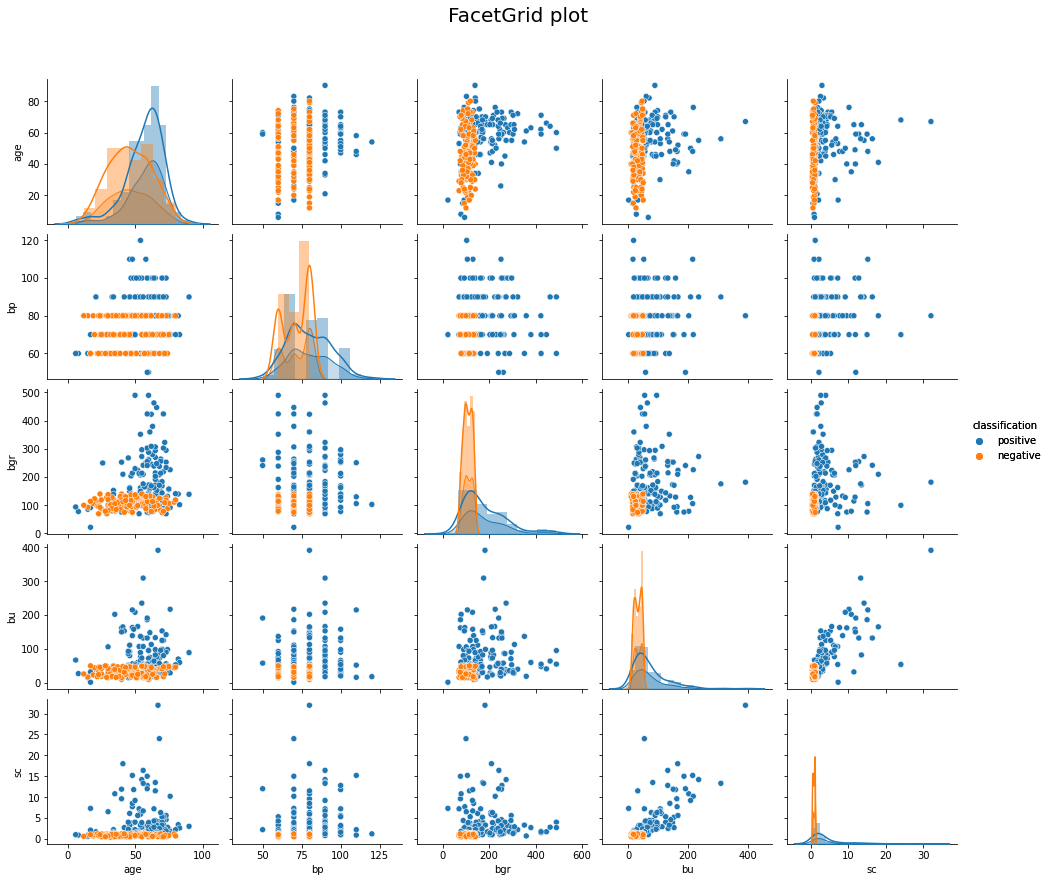

In [12]:
import seaborn as sns
g = sns.pairplot(data, vars =['age', 'bp','bgr', 'bu', 'sc'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

As we look at the graph above, we can see that most of the variables show a separate clusters or curves for values with positive and negative classification. These varibles surely show different properties at for different classes of prediction varibles. Let us look at the correlation matrix.

********************************************************************************************************************************************

## Correlation

Let is have a look at the correlation matrix to check the correlation between variables. 

In [13]:
# Getting the correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='RdBu_r')

,id,age,bp,sg,al,su,bgr,bu,sc
id,1.000000,-0.283391,-0.264168,0.642920,-0.550464,-0.277874,-0.346394,-0.336195,-0.359075
age,-0.283391,1.000000,0.176131,-0.278456,0.213723,0.218138,0.312481,0.190716,0.153954
bp,-0.264168,0.176131,1.000000,-0.218407,0.234603,0.171201,0.118603,0.179507,0.191709
sg,0.642920,-0.278456,-0.218407,1.000000,-0.515723,-0.332909,-0.405843,-0.390170,-0.419489
al,-0.550464,0.213723,0.234603,-0.515723,1.000000,0.317732,0.393910,0.475273,0.427318
su,-0.277874,0.218138,0.171201,-0.332909,0.317732,1.000000,0.734651,0.198032,0.251552
bgr,-0.346394,0.312481,0.118603,-0.405843,0.393910,0.734651,1.000000,0.201933,0.164405
bu,-0.336195,0.190716,0.179507,-0.390170,0.475273,0.198032,0.201933,1.000000,0.788995
sc,-0.359075,0.153954,0.191709,-0.419489,0.427318,0.251552,0.164405,0.788995,1.000000


Text(0, 0.5, 'Age')

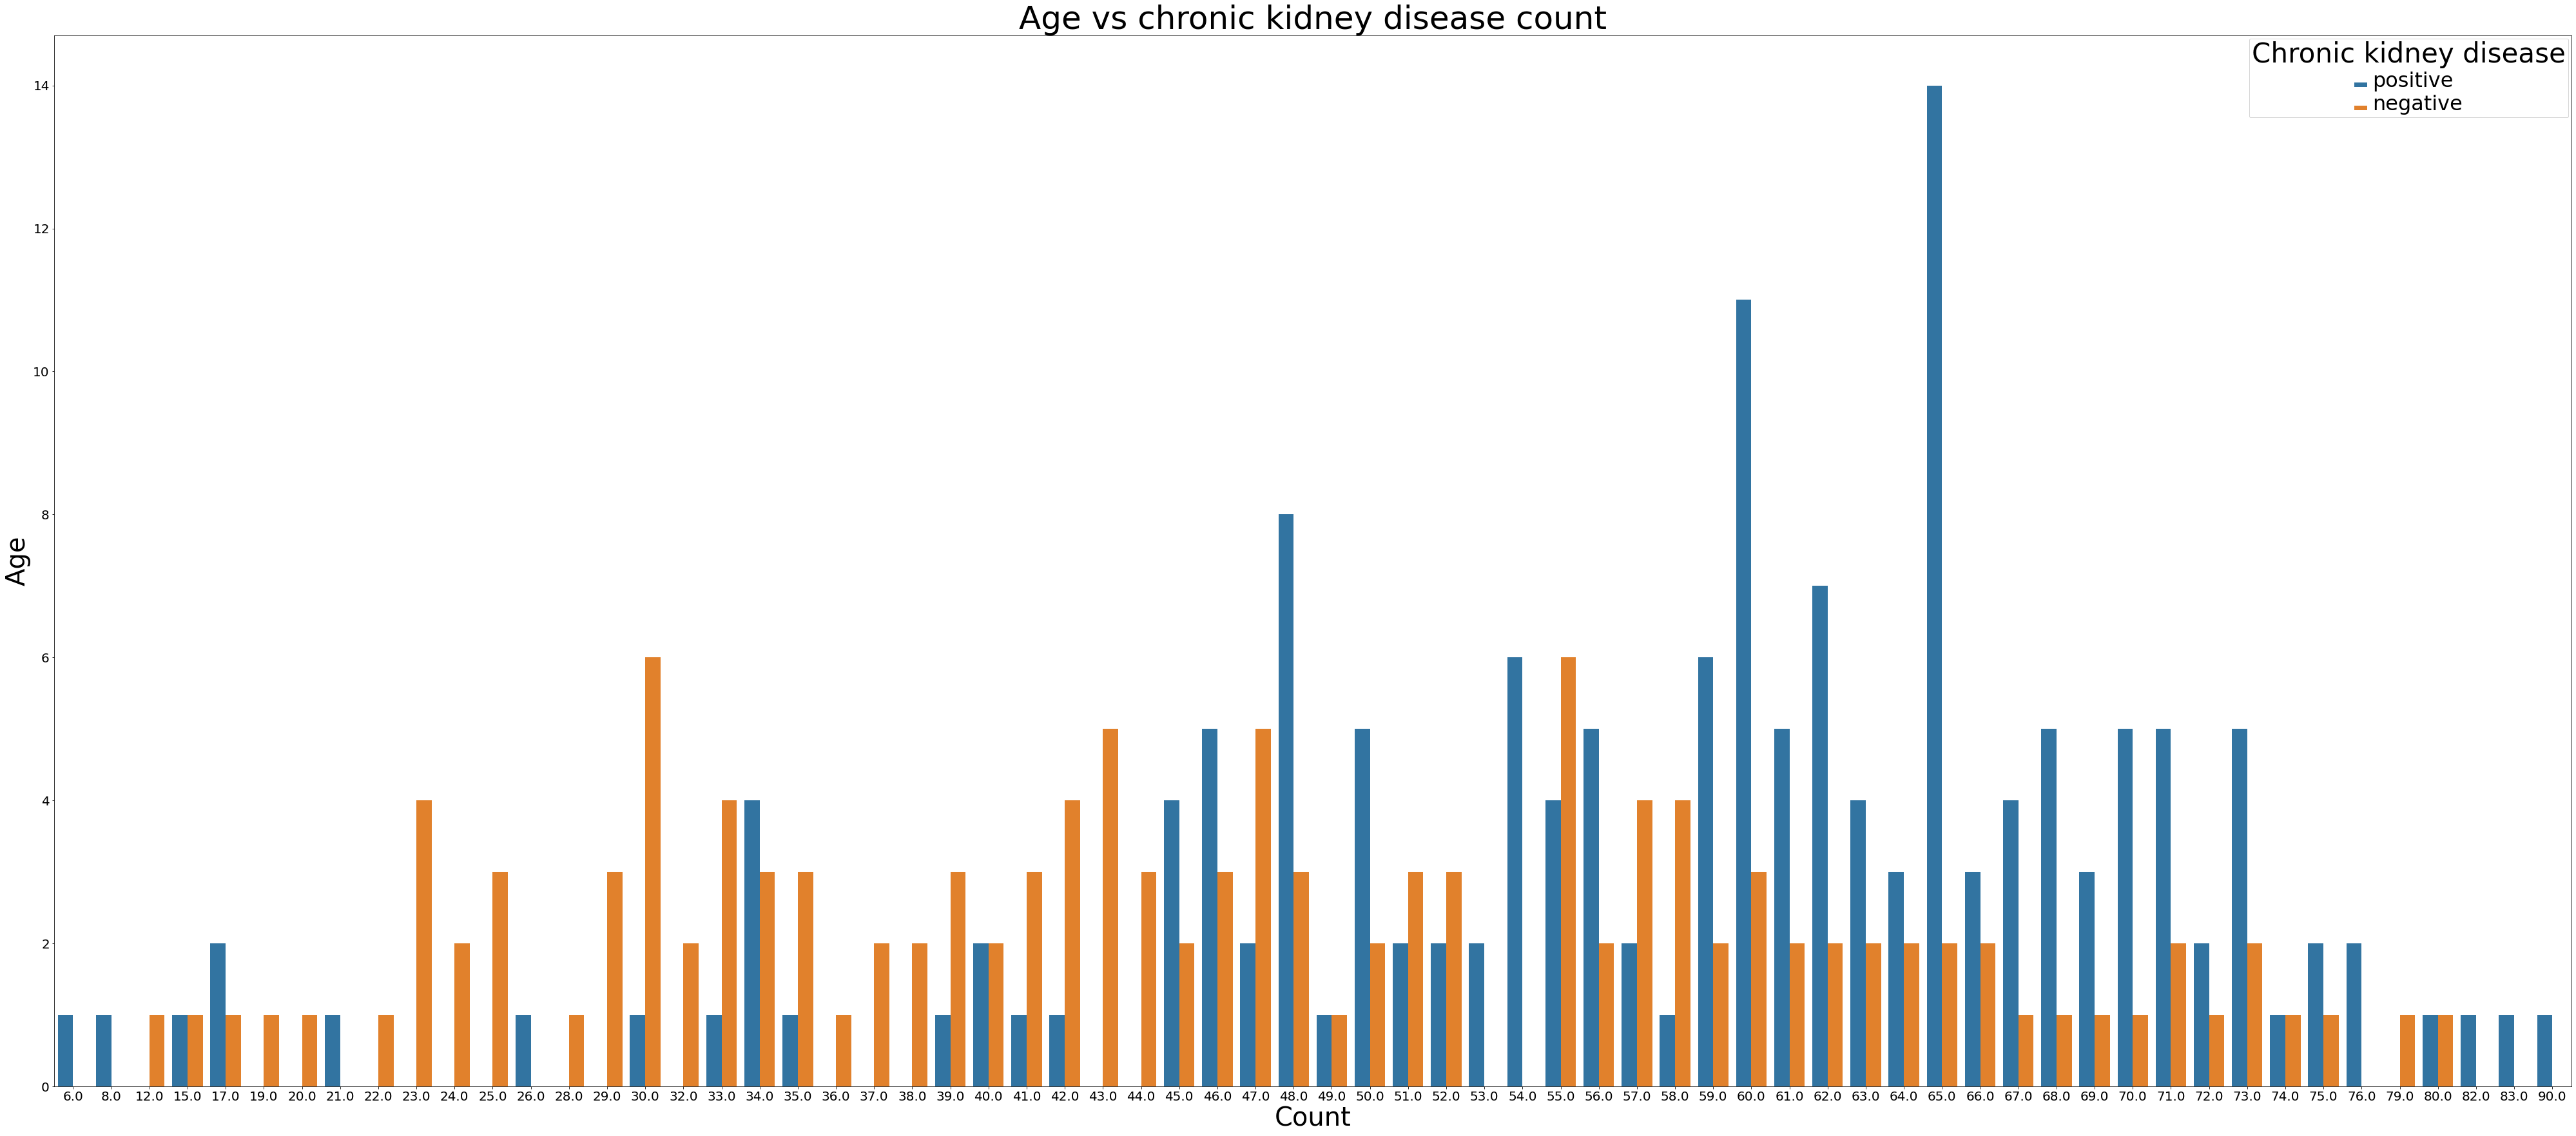

In [14]:
import matplotlib.pyplot as plt
# Let us look at the behaviour of Age with classification
plt.figure(figsize=(70,30))
g = sns.countplot(data = data, x = 'age', hue = 'classification')
g.legend(title = 'Chronic kidney disease', loc=1)
g.tick_params(labelsize=20)
plt.setp(g.get_legend().get_texts(), fontsize='32')
plt.setp(g.get_legend().get_title(), fontsize='42')
g.axes.set_title('Age vs chronic kidney disease count',fontsize=50)
g.set_xlabel('Count',fontsize=40)
g.set_ylabel("Age",fontsize=40)

As we can clearly observe, the number of people with CKD are more in higher age group. We can roughly conclude that there are more elder people in positive group.
********************************************************************************************************************************************

### Correlation between Age and Chronic Kidney Disease

Let us look at frequency of people in positive and negative group and correlation between age and number of people positive/negative of that age. First we look at positive age group.

In [15]:
age_data = data[["age", "classification"]]
age_data_pos = age_data[age_data['classification'] == "positive"].groupby(['age']).size().reset_index(name = 'count')
age_data_pos.corr()

,age,count
age,1.00000,0.23967
count,0.23967,1.00000


As we can there is a positive correlation between age and number of CKD positive people of that age. Let us plot and a linear regression fit curve to see this pattern.

Text(0.5, 1.0, 'Correlation graph for Age vs CKD positive patient')

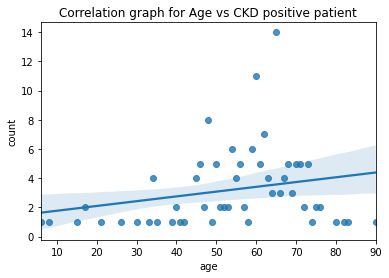

In [16]:
sns.regplot(data = age_data_pos, x = 'age', y = 'count').set_title("Correlation graph for Age vs CKD positive patient")

As we can see clearly that as age increases the number of cases of patients with CKD is increasing. 

### EFFECTS OF AGING ON THE KIDNEYS :

Changes in the kidneys that occur with age: As people age, there is a slow, steady decline in the weight of the kidneys, amount of kidney tissue decreases and kidney function diminishes. Number of filtering units (nephrons) decreases. Nephrons filter waste material from the blood.

After about age 30 to 40, about two thirds of people (even those who do not have kidney disease) undergo a gradual decline in the rate at which their kidneys filter blood.

In [17]:
age_data = data[["age", "classification"]]
age_data_neg = age_data[age_data['classification'] == "negative"].groupby(['age']).size().reset_index(name = 'count')
age_data_neg.corr()

,age,count
age,1.000000,-0.142901
count,-0.142901,1.000000


As we can see, there is a negative correlation. The number of healthy people with increasing tend to decrease.

Let us look linear regression fit.

Text(0.5, 1.0, 'Correlation graph for Age vs CKD negative patient')

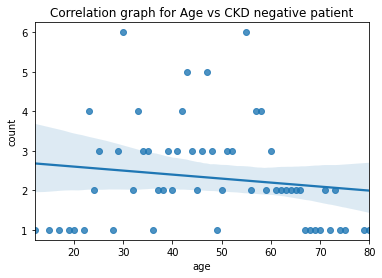

In [18]:
sns.regplot(data = age_data_neg, x = 'age', y = 'count').set_title("Correlation graph for Age vs CKD negative patient")

We can see clearly a descreasing graph.

********************************************************************************************************************************************
### Correlation between Blood Pressure and Chronic Kidney Disease

As previous, we will look at correlation between Blood pressure and CKD.

### BP with CKD
Hypertension is one of the leading causes of CKD due to the deleterious effects that increased BP has on kidney vasculature. Long-term, uncontrolled, high BP leads to high intraglomerular pressure, impairing glomerular filtration.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f208cca7978>,
      dtype=object)

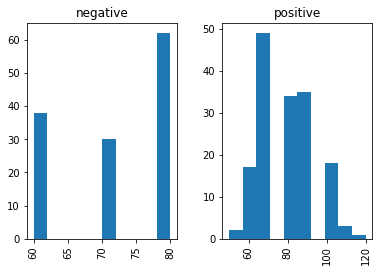

In [19]:
data.hist(column = "bp", by = "classification")

We can see that Blood Pressure is more for CKD positive group.

********************************************************************************************************************************************
#### PUS CELL CLUMPS (PCC) :

In [20]:
data[data["classification"] == "positive"].pcc.describe()

count     159
unique      2
top         0
freq      122
Name: pcc, dtype: object

In [21]:
data[data["classification"] == "negative"].pcc.describe()

count     130
unique      1
top         0
freq      130
Name: pcc, dtype: object

If we look at the PCC(Pus Cell Clump) for the patients, none of the sample in the healthy group reported PCC but 37 out of 159 people reported PCC in diseased group. We can say that there are chances of developing PCC if CKD is positive.

********************************************************************************************************************************************
###  Serum Creatinine (SC) :

Elevated creatinine level signifies impaired kidney function or kidney disease. As the kidneys become impaired for any reason, the creatinine level in the blood will rise due to poor clearance of creatinine by the kidneys. Abnormally high levels of creatinine thus warn of possible malfunction or failure of the kidneys.

I want to plot a histogram of serum creatinine (SC) for both groups.

(array([ 1., 20., 13., 16.,  0., 11., 12., 11., 18., 28.]),
 array([0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 , 0.88, 0.96, 1.04, 1.12, 1.2 ]),
 <a list of 10 Patch objects>)

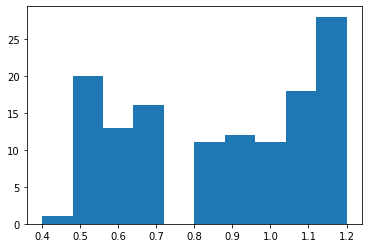

In [22]:
plt.hist(data[data["classification"] == "negative"].sc) #.hist(column = "sc")

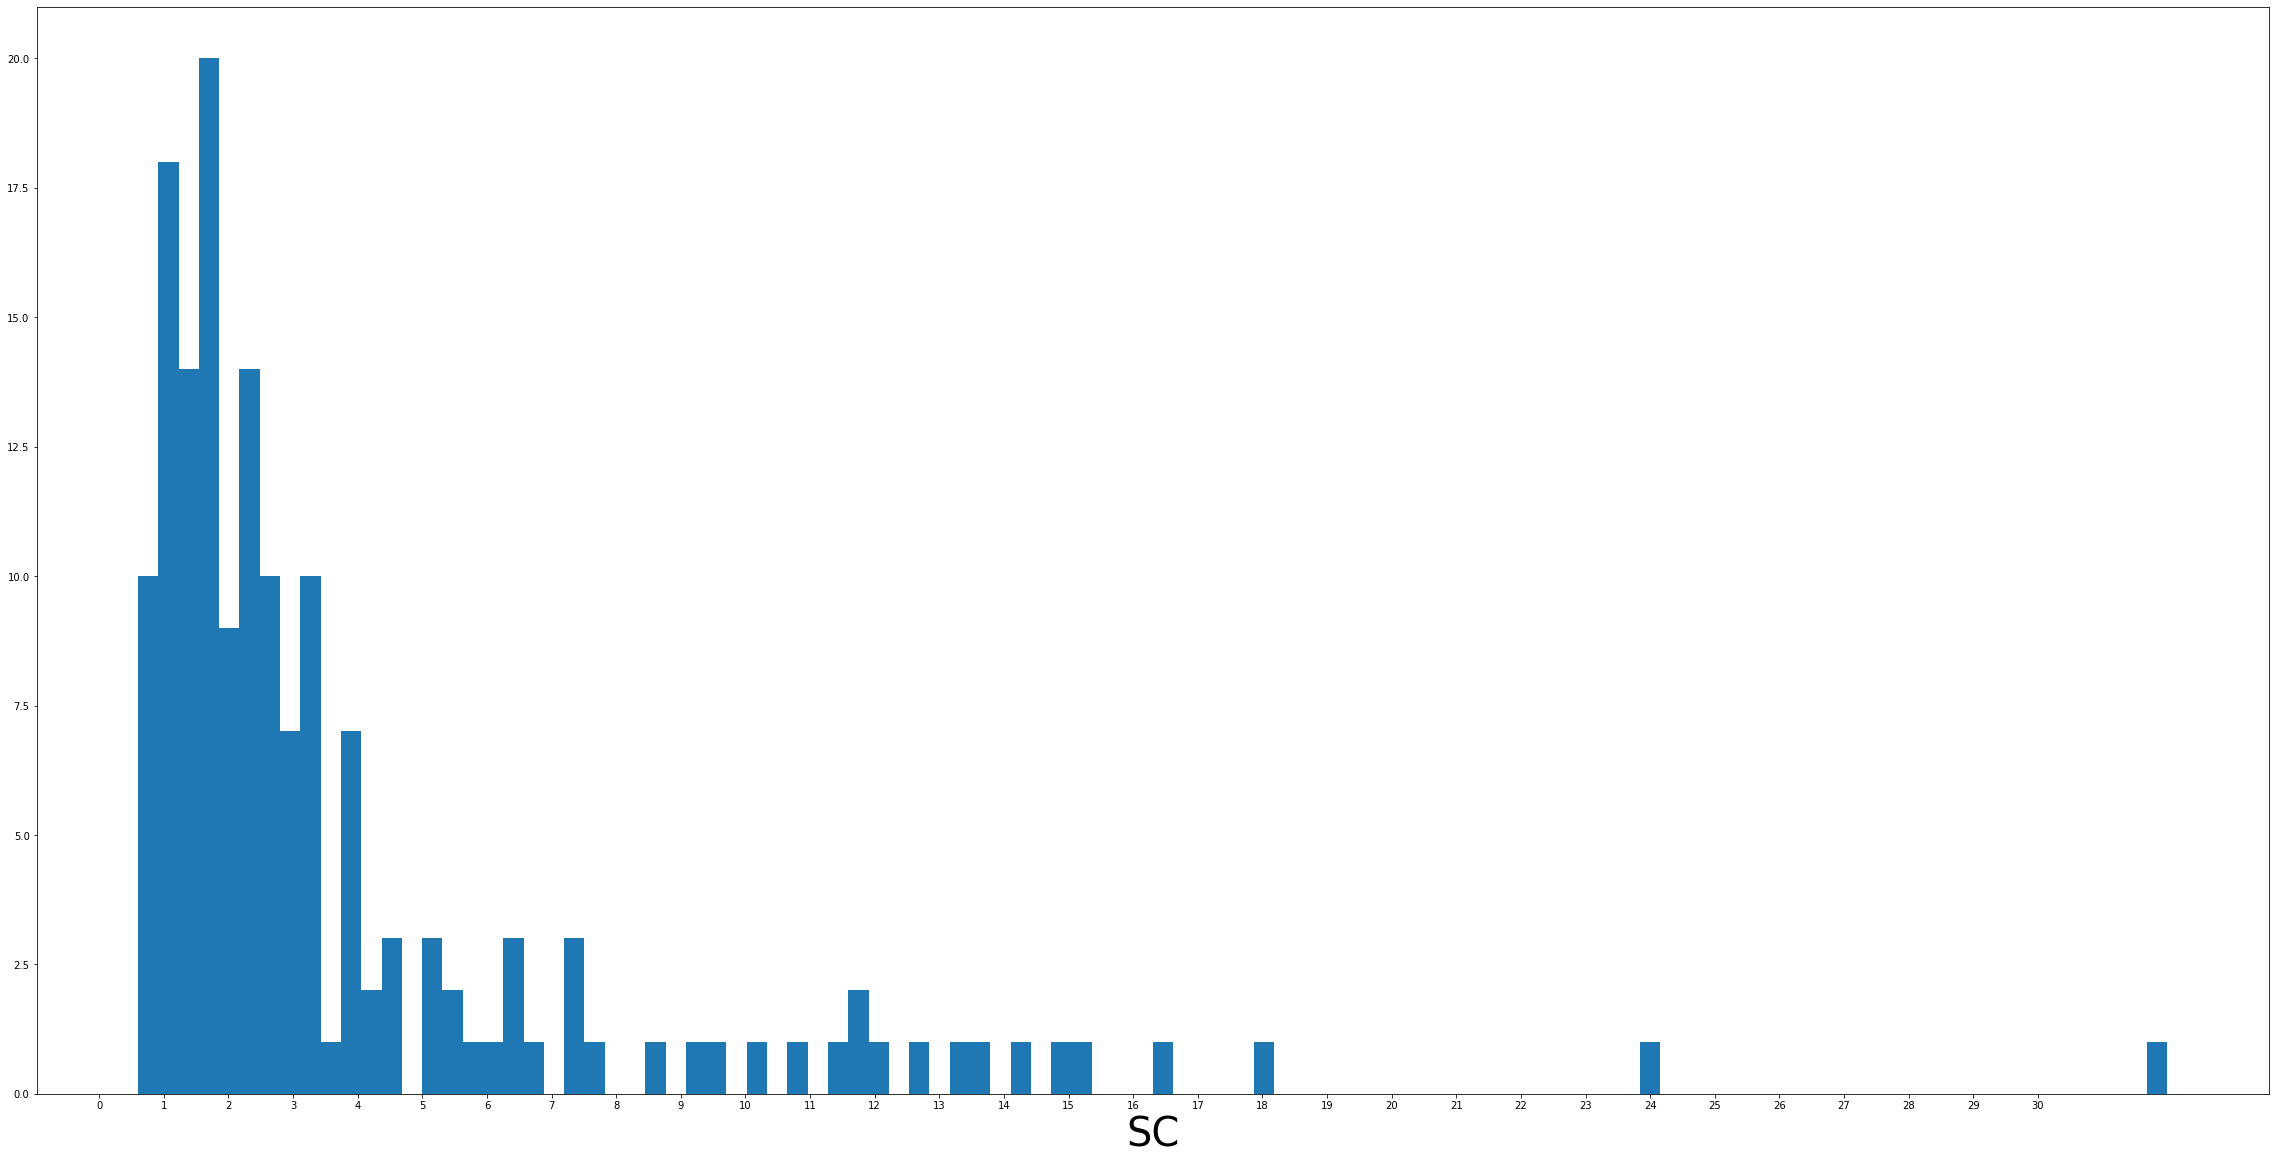

In [23]:
plt.figure(figsize = (40,20))
plt.hist(data[data["classification"] == "positive"].sc, bins = 100)
#plt.xticks(20)
plt.xlabel("SC", fontsize = 40)
plt.rcParams['font.size'] = '40'
xtcs = [i for i in range(31)]
plt.xticks(xtcs)
plt.show()

The SC value, as expected, is between 1.2 and 1.7 for healthy group. But for CKD positive group, we can observe that it is even going up to 30.
So, SC can be used as one of the best predictors for the CKD Diagnosis.

# CONCLUSION 

I have analyzed the bp, age, serum creatinine with classification. If we look at the correlation graph of age and classification, we can clearly notice that as the age increases the chances of getting CKD increases. If we check the correlation graph of bp and classification,it indicates that the patients with high blood pressure(bp) are more prone to CKD. Correlation graph of  serum creatinine (sc) with classification, shows that the patients who have more than 1.7 of serum creatinine level are positive with CKD. 

# SIGNIFICANCE OF MY WORK

Firstly, I seperated the patients who are "positive" and "negative" with CKD, to get a basic idea of the dataset. Next, I planned to correlate the age and classification to know the impact of age on Chronic Kidney Disease, and the outcome I got is, as the age increases people are more porne to get Chronic Kidney Disease (CKD). Research says that about age 30 to 40, about two thirds of people (even those who do not have kidney disease) undergo a gradual decline in the rate at which their kidneys filter blood. The reason is that as the age increases, there is a slow, steady decline in the weight of the kidneys, amount of kidney tissue decreases and kidney function diminishes. Number of filtering units (nephrons) decreases by this the filteration of waste material from the blood is deminishes. With this, I can predict by analyzing the graph, the age can also be an important factor in diagnosis of Chronic Kidney Disease (CKD).

I wanted to check the impact of hypertension on CKD on this dataset. Here, with this dataset I get to know that alot of patients with high blood pressure are suffering with CKD already. By this, we have known that high blood pressure (Hypertension) can cause Kidney Disease. We can predict that patients who are suffering with Hypertension can get CKD in future. so, people who are with high blood pressure, should follow proper diet, should take medicines in time and always monitor blood pressure more frequently. Everyone who are with Hypertension should take precautions.

Creatinine is a non-protein nitrogenous compound that is produced by the breakdown of creatine in muscle. Creatine is synthesized in the liver, pancreas, and kidneys from the transamination of the amino acids arginine, glycine, and methionine. Creatinine is also considered as an indicator of renal function. So, I correlated the serum creatinine levels of patients with classification and I noticed that the majority of patients who are above 1.7 mg/dL are suffering with CKD. By measuring Serum Creatinine(sc), we can diagnose which stage of CKD the patient is in. Then accordingly, the treatment is done to the patient and also by checking the sc levels once in a month can also helps to keep the disease in control.

Along with it, I wanted to know how many of them with CKD positive, reported the pus cell clumps (pcc).Pus cell clumps are also called as Pyuria. In addition to that, I also wanted to check this on CKD negative patients. Then, I found out that 37 out of 159 people reported PCC in diseased group. Here, I can predict that their are a few chances of developing Pus Cell Clumps (pcc) in patients who are suffering with CKD. The presence of pyuria (pus cell clumps (pcc)) is, in general, highly suggestive of Urinary Tract Infections (UTI), especially in symptomatic patients. Here, Pyuria seems to be common in patients with chronic kidney disease (CKD). Sterile pyuria is considered to occur in CKD owing to chronic renal parenchymal inflammation. However, there are limited data on whether CKD increases the rate of pyuria or how pyuria in CKD should be interpreted.

In [24]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

In [25]:
%%bash
git pull
git add final.ipynb
git commit -a -m "Submitting the final assignment"
git push

Already up to date.
[main 47648c4] Submitting the final assignment
 1 file changed, 30 insertions(+), 2 deletions(-)


remote: This repository moved. Please use the new location:        
remote:   git@github.com:AjithKumar-07/hds5210-2021.git        
To github.com:ajithkumar-07/hds5210-2021.git
   0ffd041..47648c4  main -> main
